#Import necessary libraries:

In [2]:
# Lets start the code by importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

#Load the Data Set:

In [3]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
#  last 5 rows of dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
25837,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

#Data Cleaning and Preprocessing

In [6]:
# checking number of missing values:
df.isnull().sum()

# Find distribution of Normal transaction or Fraud transaction:
df['Class'].value_counts()

Class
0.0    25749
1.0       88
Name: count, dtype: int64

###Now we will separate Normal and Fraud transactions, and analyze and visualize that fraud and normal data :

(25749, 31)
(88, 31)


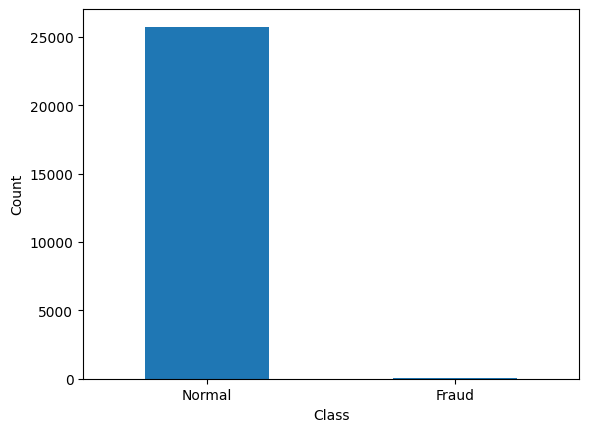

In [19]:
# Separating the data:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]
# check shape
print(normal.shape)
print(fraud.shape)

#visualize the data:
import matplotlib.pyplot as plt
labels = ["Normal", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

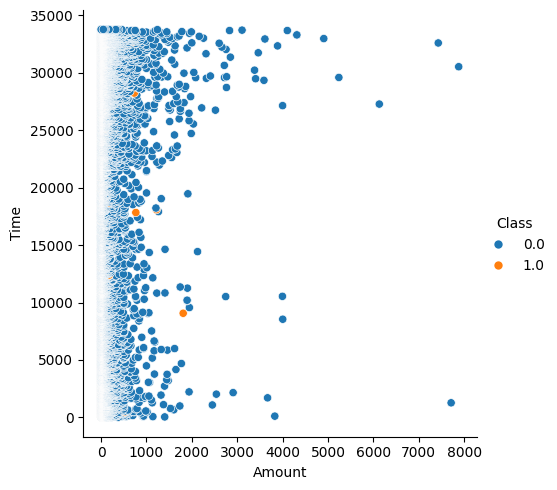

In [8]:
# statistical measures of the data:
normal.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
import seaborn as sns
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = df)

In [9]:
# Compare values of both transactions:
df.groupby('Class').mean()

# Now we will build a sample dataset containing similar distribution of normal transaction and fraud transaction:
normal_sample = normal.sample(n=492)
# Concat two data ( normal_sample and fraud) to create new dataframe which consist equal number of fraud transactions and normal transactions, In this way we balance our dataset (As our dataset is highly unbalanced initially) :
data = pd.concat([normal_sample, fraud], axis=0)
# Let’s see our new dataset:
data

# Analyse our new dataset:
data['Class'].value_counts()

Class
0.0    492
1.0     88
Name: count, dtype: int64

#Splitting the data:

In [10]:
# Splitting data into features and targets
X = data.drop('Class', axis=1)
Y = data['Class']

# splitting the data into training and testing data:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)

(580, 30) (464, 30) (116, 30)


#Applying Models:

##Logistic Regression Model:

In [11]:
from sklearn.linear_model import LogisticRegression
# training the Logistic Regression model with training data:
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

##Decision Tree Model

In [12]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

##Random Forest Model

In [13]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

#Evaluation

##Predictions on test data

In [14]:
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test)
y_pred_decision_tree = decision_tree_classifier.predict(X_test)
y_pred_random_forest = rf_classifier.predict(X_test)

##Calculate and compare accuracy scores

In [16]:
accuracy_logistic_regression = accuracy_score(Y_test, y_pred_logistic_regression)
accuracy_decision_tree = accuracy_score(Y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(Y_test, y_pred_random_forest)

print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Random Forest Accuracy:", accuracy_random_forest)

Logistic Regression Accuracy: 0.9913793103448276
Decision Tree Accuracy: 0.9655172413793104
Random Forest Accuracy: 0.9913793103448276


###Confusion Metrices

In [17]:
# Print the confusion matrices
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_logistic_regression))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_decision_tree))
print("Random Forest Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_random_forest))


Logistic Regression Confusion Matrix:
 [[98  0]
 [ 1 17]]
Decision Tree Confusion Matrix:
 [[97  1]
 [ 3 15]]
Random Forest Confusion Matrix:
 [[98  0]
 [ 1 17]]


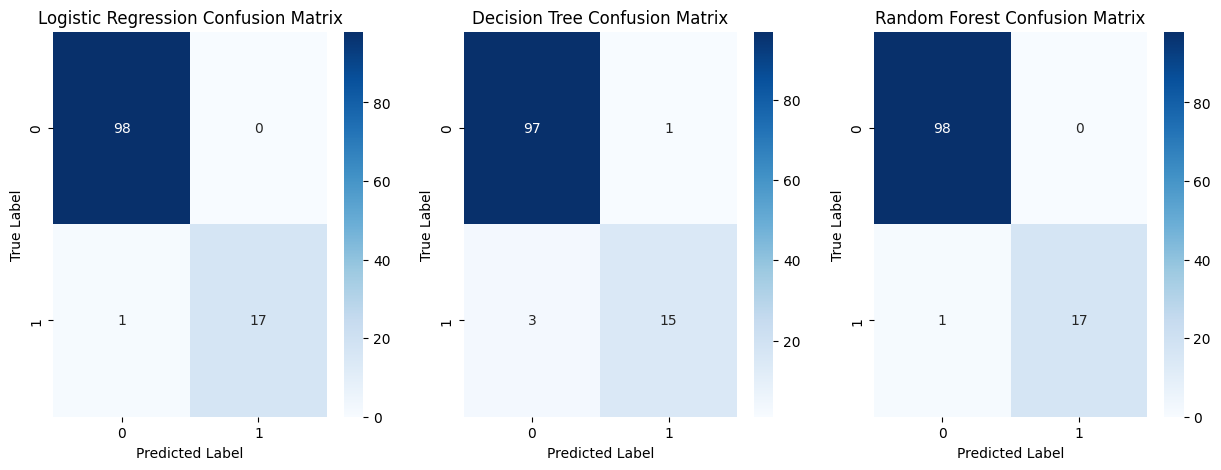

In [18]:
#  function to plot confusion matrices for different models
def plot_confusion_matrices(y_true, y_pred_list, model_names):
    fig, axes = plt.subplots(1, len(model_names), figsize=(15, 5))
    for i, (y_pred, model_name) in enumerate(zip(y_pred_list, model_names)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
        axes[i].set_title(f"{model_name} Confusion Matrix")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    plt.show()

# Plot the confusion matrices
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
plot_confusion_matrices(Y_test, [y_pred_logistic_regression, y_pred_decision_tree, y_pred_random_forest], model_names)


##As a Result **Logistic Regression** & **Random Forest** are performinng very Good